C:\Users\razaq\AppData\Local\Temp\ipykernel_31448\1382651267.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Views', data=category_views, palette="pastel")


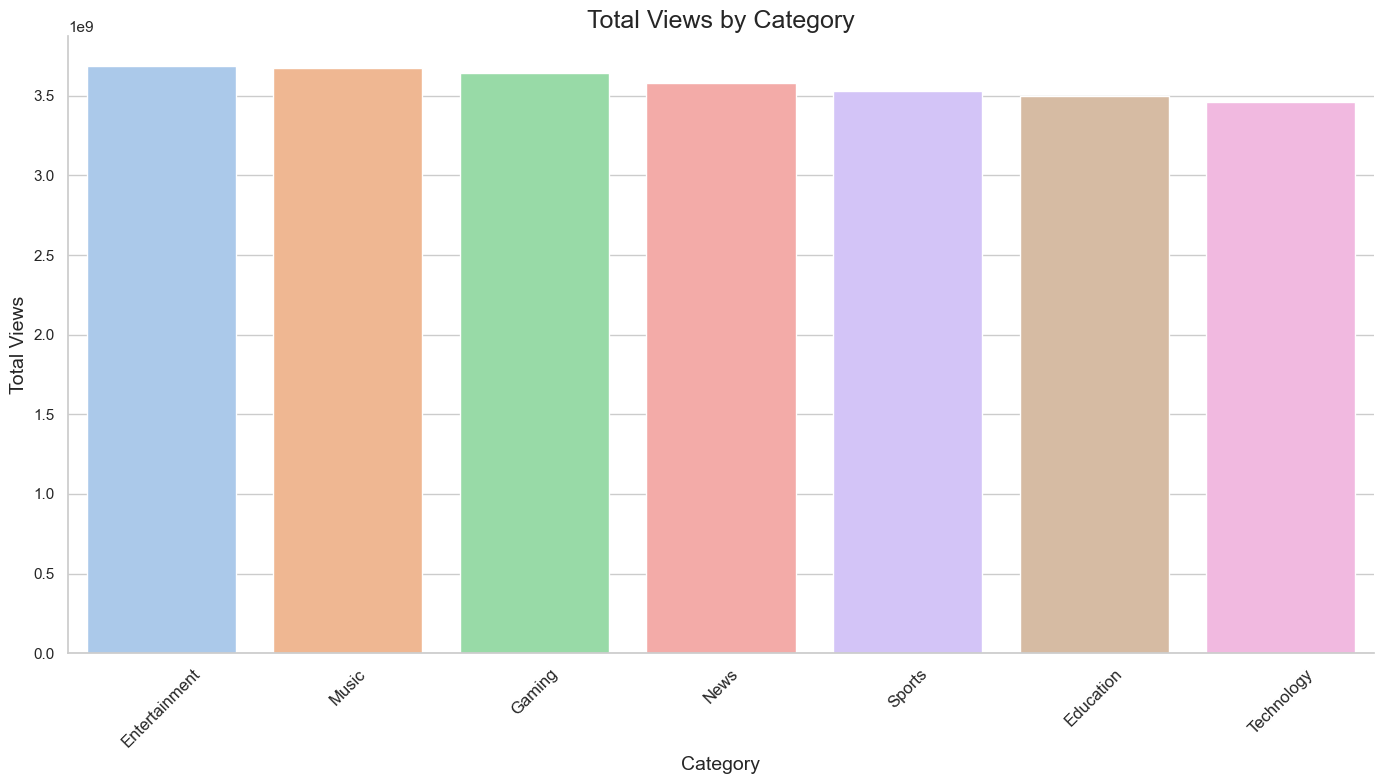

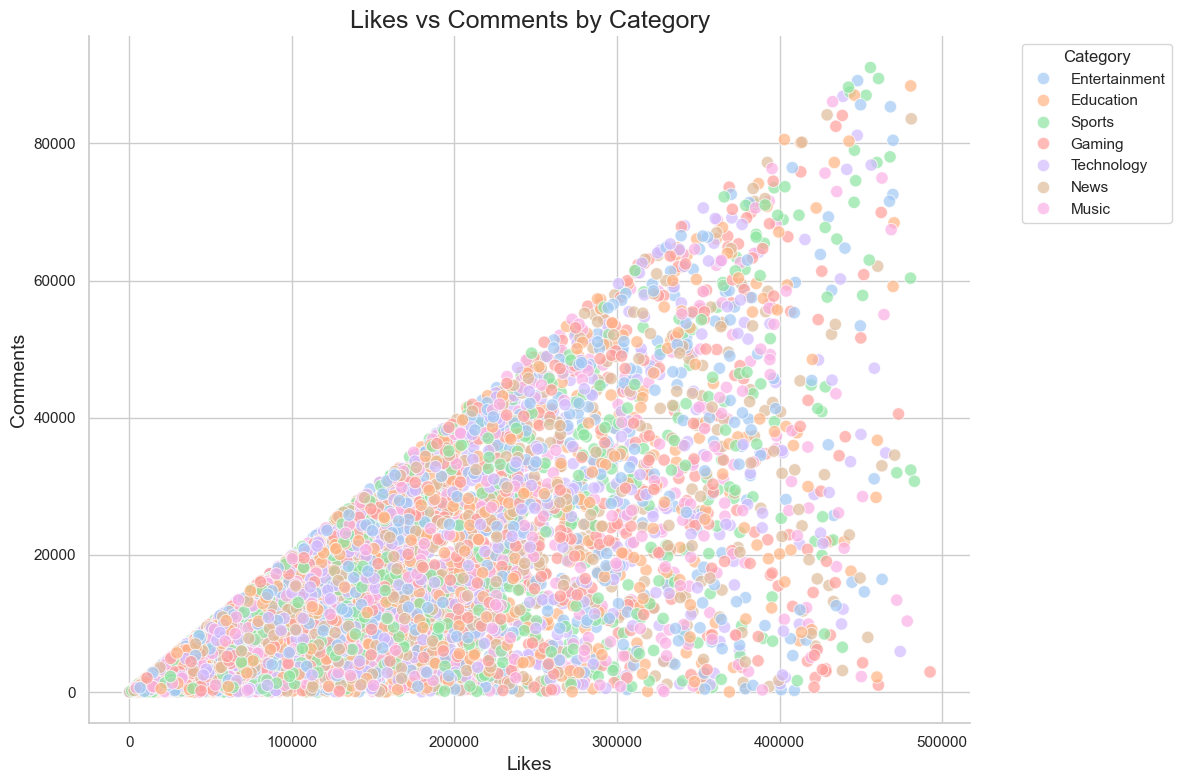

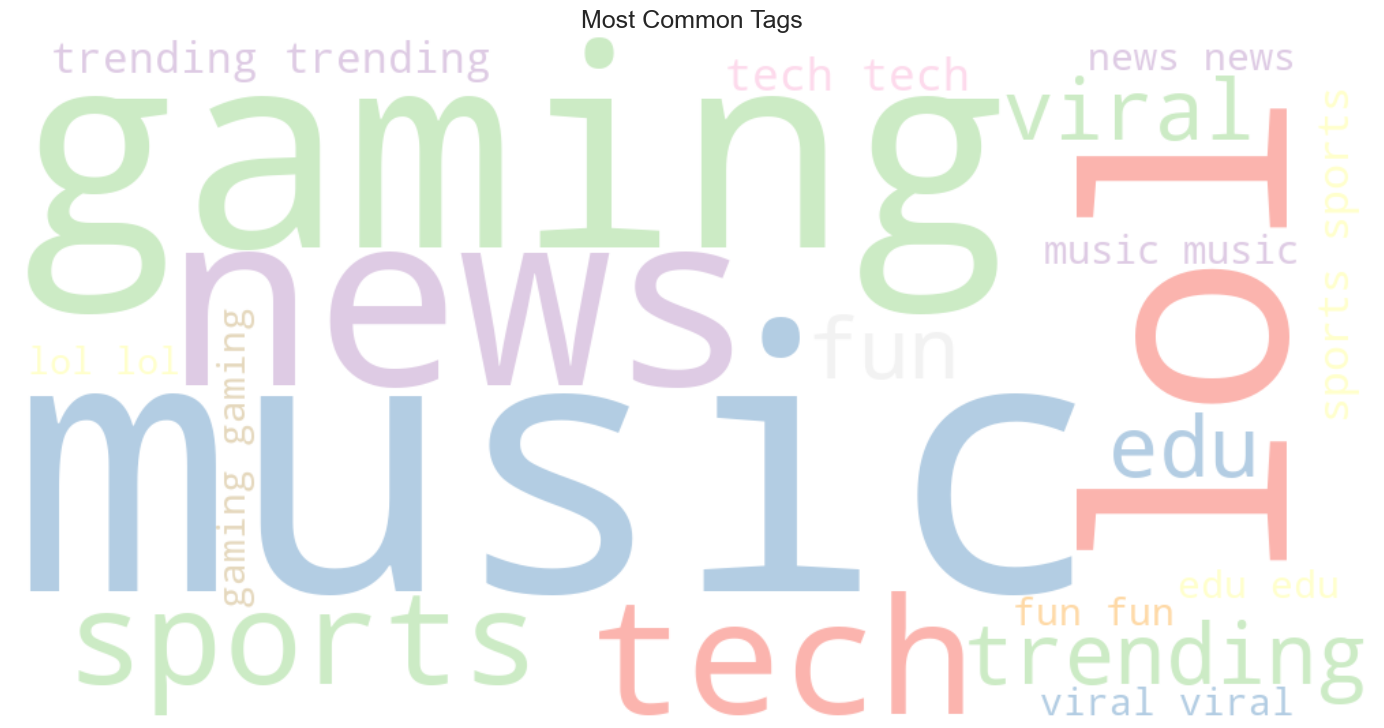

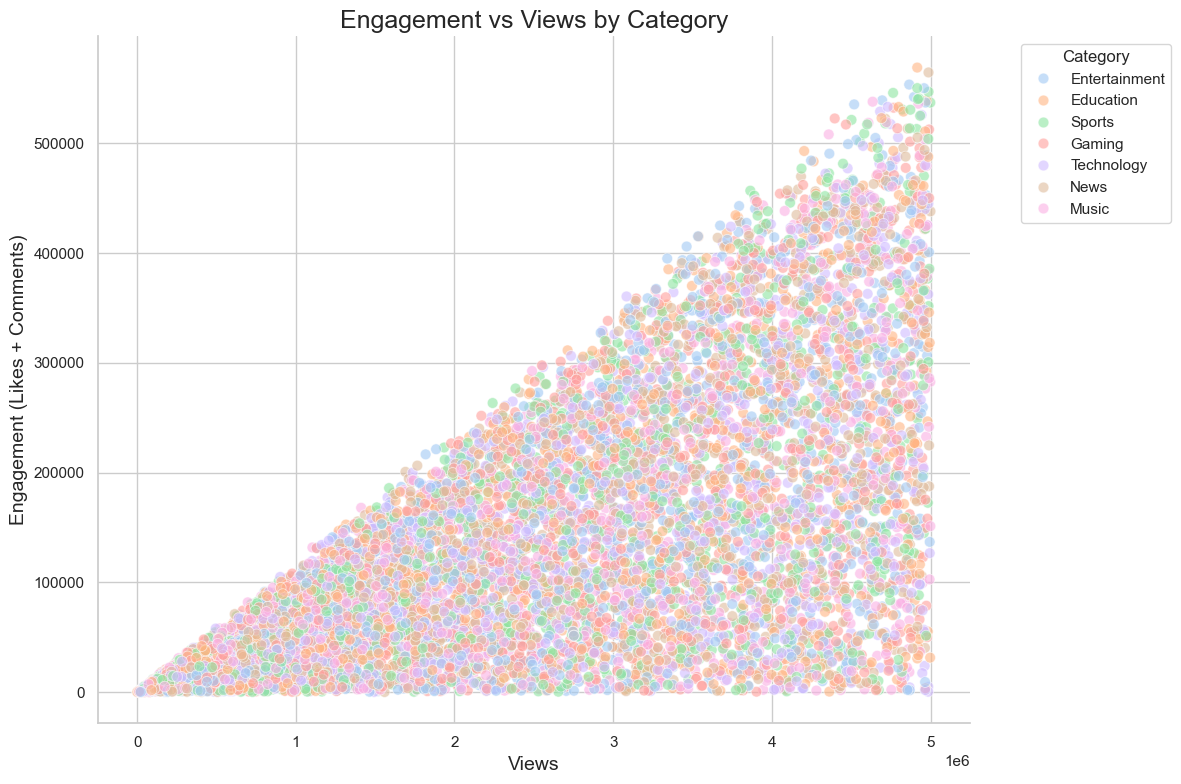

C:\Users\razaq\AppData\Local\Temp\ipykernel_31448\1382651267.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


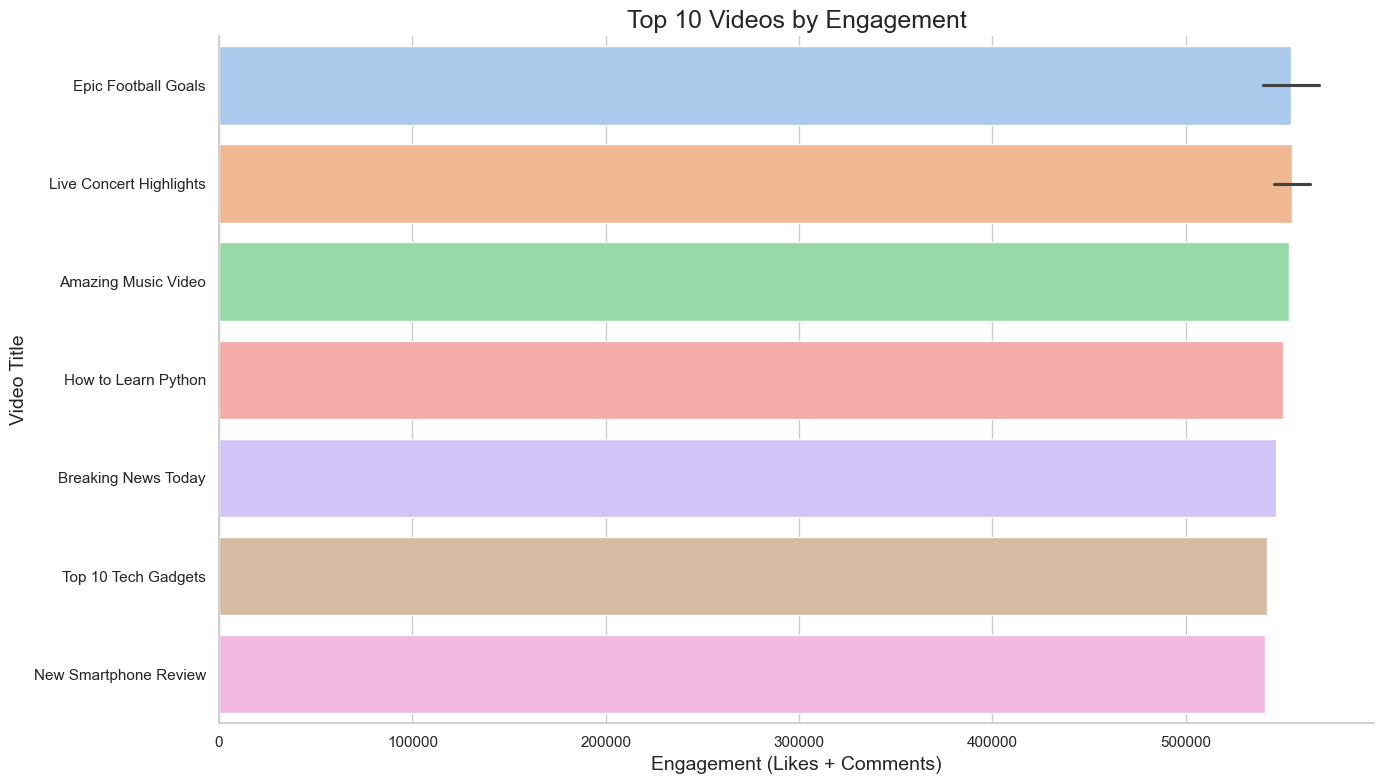

In [1]:
# ===============================
# Step 0: Import Libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set aesthetic style
sns.set(style="whitegrid")  # clean background

# ===============================
# Step 1: Load Dataset
# ===============================
df = pd.read_csv(r"C:\Users\razaq\Downloads\youtube_trends_large.csv")  # your path
df.columns = df.columns.str.strip()  # remove extra spaces

# ===============================
# Step 2: Create Engagement Column
# ===============================
df['Engagement'] = df['Likes'] + df['Comments']

# ===============================
# Step 3: Total Views by Category (Bar Plot)
# ===============================
category_views = df.groupby('Category')['Views'].sum().reset_index()
category_views = category_views.sort_values(by='Views', ascending=False)

plt.figure(figsize=(14,8))
sns.barplot(x='Category', y='Views', data=category_views, palette="pastel")
plt.title("Total Views by Category", fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Total Views", fontsize=14)
plt.xlabel("Category", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

# ===============================
# Step 4: Likes vs Comments Scatter Plot
# ===============================
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Likes',
    y='Comments',
    data=df,
    hue='Category',
    palette="pastel",
    alpha=0.7,
    s=80
)
plt.title("Likes vs Comments by Category", fontsize=18)
plt.xlabel("Likes", fontsize=14)
plt.ylabel("Comments", fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# ===============================
# Step 5: Word Cloud of Tags
# ===============================
text = " ".join(tag for tag in df['Tags'] if isinstance(tag, str))

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='Pastel1'
).generate(text)

plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Tags", fontsize=18)
plt.tight_layout()
plt.show()

# ===============================
# Step 6: Engagement vs Views Scatter Plot
# ===============================
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Views',
    y='Engagement',
    data=df,
    hue='Category',
    palette="pastel",
    alpha=0.6,
    s=60
)
plt.title("Engagement vs Views by Category", fontsize=18)
plt.xlabel("Views", fontsize=14)
plt.ylabel("Engagement (Likes + Comments)", fontsize=14)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

# ===============================
# Step 7: Top 10 Videos by Engagement (Bar Plot)
# ===============================
top_videos = df.sort_values(by='Engagement', ascending=False).head(10)

plt.figure(figsize=(14,8))
sns.barplot(
    x='Engagement',
    y='Title',
    data=top_videos,
    palette="pastel"
)
plt.title("Top 10 Videos by Engagement", fontsize=18)
plt.xlabel("Engagement (Likes + Comments)", fontsize=14)
plt.ylabel("Video Title", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()
